In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

%matplotlib inline

In [4]:
def lfun(xvals,jj,x):
    lval = np.ones(x.size)
    xjj = xvals[jj]
    xrem = xvals[:jj]
    xrem = np.append(xrem,xvals[jj+1:])
    denom = np.prod(xjj - xrem)
    for val in xrem:
        lval *= (x-val)
    return lval/denom

def lagran_interp(xvals,fvals,x):
    n = fvals.size
    ipoly = np.zeros(x.size)
    for jj in range(n):
        ipoly += fvals[jj]*lfun(xvals,jj,x)
    return ipoly

**Problem 1**: 10 pts - For the function

$$
f(x) = \frac{x^{2}}{1+x^{4}}, ~ -1 \leq x \leq 1
$$

a) (2pts) Using an equispaced set of $10$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

b) (2pts) Using an equispaced set of $20$ nodes, generate the Lagrange interpolating polynomial to $f(x)$.  Generate a plot which shows how the error in your approximation varies over the interval.  

c) (2pts) At what number of equispaced nodes does your Lagrange interpolation approximation break down?  

d) (4pts) Does using Chebyshev points help resolve the issues you saw in c) ?  Provide examples to verify your claim.

_Answer_

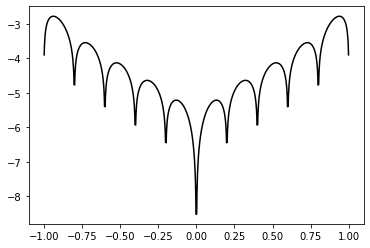

In [7]:
xinterp = np.linspace(-1.,1.,int(1e3)+1)
ftrue = (xinterp ** 2) / (1 +xinterp**4)
xvals = xinterp[::int(1000/10)]
fvals = ftrue[::int(1000/10)]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

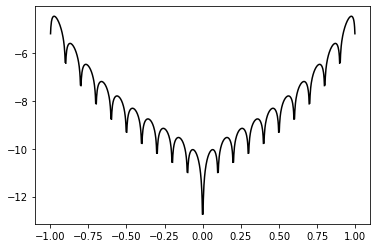

In [8]:
xvals = xinterp[::int(1000/20)]
fvals = ftrue[::int(1000/20)]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

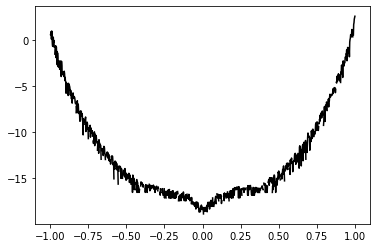

In [9]:
xvals = xinterp[::int(1000/67)]
fvals = ftrue[::int(1000/67)]
finterp = lagran_interp(xvals,fvals,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color='k')

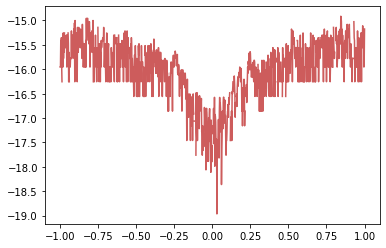

In [21]:
ncheb = 100
xcheb = np.cos( (np.pi*( 2*np.arange(0,ncheb + 1) + 1)) / (2*ncheb + 2) )
fcheb = (xcheb ** 2) / (1 +xcheb**4)
finterp = lagran_interp(xcheb,fcheb,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color="indianred")

Break Down in my Lagrange interpolation approximation at 67 nodes.  The error goes from $10^{-6}$ with 20 nodes, then 1.0 with 67 nodes.  We should be getting less error with more nodes

Using the Chebyshev points ensures that for all values of ncheb, there will be no break downs in the approximations.  Using 50 versus 100, the error stayed the same at $10^{-15}$ error

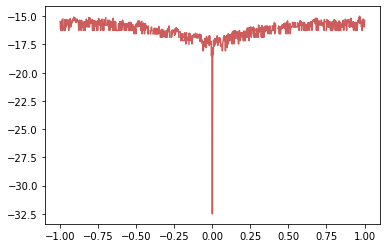

In [23]:
ncheb = 50
xcheb = np.cos( (np.pi*( 2*np.arange(0,ncheb + 1) + 1)) / (2*ncheb + 2) )
fcheb = (xcheb ** 2) / (1 +xcheb**4)
finterp = lagran_interp(xcheb,fcheb,xinterp)
plt.plot(xinterp,np.ma.log10(np.abs(ftrue-finterp)),ls='-',color="indianred")

**Problem 2**: 10 pts - For the basis functions of Lagrange interpolation, $L^{(n)}_{j}(x)$, where 

$$
L^{(n)}_{j}(x) = \prod_{l=0, ~l\neq j}^{n}\frac{(x-x_{l})}{(x_{j}-x_{l})}
$$

a) (3pts) Show that 

$$
\frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
$$

b) (2pts) From this, find that 

$$
\frac{d}{dx} L^{(n)}_{j}(x_{k}) = \left\{ \begin{array}{rl} \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}} & k=j \\
& \\
\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})} & k\neq j
\end{array}\right.
$$

c) (2pts) If we suppose the Lagrange polynomial $P_{n}(x)$ is given by 

$$
P_{n}(x) = \sum_{j=0}^{n}f_{j}L^{(n)}_{j}(x),
$$

so that $P_{n}(x)\approx f(x)$, $f_{j}=f(x_{j})$, provide a brief explanation of how the formulas in part (b) allow you to generate finite-difference approximations to $f'(x_{j})$ for any number of points with any type of interpoint spacing.  

d) (3pts) Given the data $\left\{x_{j-1},f_{j-1},x_{j},f_{j},x_{j+1},f_{j+1},x_{j+2},f_{j+2}\right\}$, where 

$$
\delta x = x_{j}-x_{j-1}=x_{j+1}-x_{j}=x_{j+2}-x_{j+1} 
$$ 

derive the _forward-difference approximation_ to $f'(x_{j})\approx P_{2}'(x_{j})$ where

$$
P_{2}(x) = f_{j}L^{(2)}_{j}(x) + f_{j+1}L^{(2)}_{j+1}(x) + f_{j+2}L^{(2)}_{j+2}(x).
$$

How does your forward-difference approximation to $f'(x_{j})$ differ from the centered-difference approximation to $f'(x_{j})$ given by 

$$
f'(x_{j}) \approx \frac{1}{2\delta x}\left(f_{j+1} - f_{j-1}\right).
$$

When might you use one or the other?

_Answer_

2a
\begin{align}
\frac{d}{dx} \prod_{l=0,~l\neq j}^{n} (x-x_{l}) 
=& 1(x-x_{1})(x-x_{2})...(x-x_{n})  + (x-x_{0})(1)(x-x_{2})...(x-x_{n}) + ... \\
=& \sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m}) \\
\\
&\text{With $m\neq l$ is what takes the derivative of each term and turns it into 1} \\ 
 & \prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l}) = C \text{ for some constant C} \\
 &\text {so...} \\ 
& \frac{d}{dx} L^{(n)}_{j}(x) = \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})
\end{align}

2b
\begin{align}
\frac{d}{dx} L^{(n)}_{j}(x) 
=&  \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})\\
\frac{d}{dx} L^{(n)}_{j}(x_{k}) 
=& \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x_{k}-x_{m}) & \text{for k=j}\\
=& \frac{1(x_{k}-x_{1})(x_{k}-x_{2})...(x_{k}-x_{n})}{(x_{k} - x_{0})(x_{k}-x_{1})(x_{k}-x_{2})...(x_{k}-x_{n})} + ....\\
=& \sum_{l=0, ~ l\neq j}^{n}\frac{1}{x_{j}-x_{l}}
\end{align}

\begin{align}
\frac{d}{dx} L^{(n)}_{j}(x) 
=&  \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x-x_{m})\\
\frac{d}{dx} L^{(n)}_{j}(x_{k}) 
=& \frac{1}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}~\sum_{l=0,~l\neq j}^{n}~ \prod_{m=0,~m\neq l, ~ m\neq j}^{n}(x_{k}-x_{m}) & \text{for k } \neq \text{j}\\\\
=& \frac{1(x_{k}-x_{1})(x_{k}-x_{2})...(x_{k}-x_{n})}{(x_{j} - x_{0})(x_{j}-x_{1})(x_{j}-x_{2})...(x_{j}-x_{n})} + \frac{(x_{k}-x_{0})(1)(x_{k}-x_{2})...(x_{k}-x_{n})}{(x_{j} - x_{0})(x_{j}-x_{1})(x_{j}-x_{2})...(x_{j}-x_{n})} + ....+\\\\
=&\frac{\prod_{m=0,~m\neq j,~m\neq k}^{n} (x_{k}-x_{m})}{\prod_{l=0,~l\neq j}^{n} (x_{j}-x_{l})}\\
\end{align}

**Problem 3**: 10 pts - Suppose I give you the data $\left\{x_{j},f_{j},s_{j}\right\}_{j=0}^{n}$, where I want to find a polynomial of degree $m$, say $P_{m}(x)$, where

$$
P_{m}(x) = \sum_{l=0}^{m}p_{l}x^{l} = p_{0} + p_{1}x + \cdots + p_{m}x^{m}, 
$$

such that 

$$
P_{m}(x_{j}) = f_{j}, ~ P'_{m}(x_{j}) = s_{j}, ~ j=0,\cdots, n.
$$

Thus, if we want $P_{m}(x)\approx f(x)$, we ask not only that $P_{m}(x)$ interpolate $f(x)$ at $x_{j}$ so that $f(x_{j})=P_{m}(x_{j}) = f_{j}$, we also require that we match the slopes so that $f'(x_{j}) = P_{m}'(x_{j}) = s_{j}$.  This approximation is called _Hermite Interpolation_.

a) (1pt) How many equations do I need to solve in this interpolation problem?  What degree of polynomial do I need to choose in order to find a unique solution to my interpolation problem?

b) (2pts) Suppose we set our approximating polynomial $P_{2n+1}(x)$ to be 

$$
P_{2n+1}(x) = \sum_{l=0}^{n}f_{l}H_{l,n}(x) + \sum_{l=0}^{n}s_{l}\tilde{H}_{l,n}(x), 
$$

where the degree of the polynomials $H_{l,n}(x)$ and $\tilde{H}_{l,n}(x)$ are $2n+1$.  Show that we need these polynomials to satisfy the requirements

$$
H_{l,n}(x_{k}) = \delta_{kl}, ~ H'_{l,n}(x_{k}) = 0, ~ \tilde{H}_{l,n}(x_{k}) = 0, ~ \tilde{H}'_{l,n}(x_{k}) = \delta_{kl},
$$

where 

$$
\delta_{kl} = \left\{\begin{array}{rl} 1 & k=l \\ 0 & k\neq l\end{array} \right.
$$

c) (3pts) Show the formulas 

$$
H_{l,n}(x) = \left(1 - 2(x-x_{l})\frac{d}{dx}L^{(n)}_{l}(x_{l}) \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

$$
\tilde{H}_{l,n}(x) = \left( x-x_{l} \right)\left( L^{(n)}_{l}(x) \right)^{2},
$$

satisfy the necessary requirements from part (b).  

d) Implement Hermite Interpolation using the results from above, including from Problem 2. For the test function 
$$
f(x) = \frac{1}{1+x^{2}}, ~ -1\leq x \leq 1,
$$
develop three test cases which show the accuracy of your method.  Over equispaced interpolation data are you able to avoid the Runge-Phenomenon that we see for standard equispaced Lagrage interpolation?

_Answer_